### 2.1 실수자료로의 전환(Vectorlization)

#### 범주화자료의 수량화(one-hot 벡터)

In [1]:
x = [{"city" : "Seoul", "temp" : 10.0}, {"city" : "Dubai", "temp" : 33.5}, {"city" : "LA", "temp" : 20.0}]
x

[{'city': 'Seoul', 'temp': 10.0},
 {'city': 'Dubai', 'temp': 33.5},
 {'city': 'LA', 'temp': 20.0}]

In [2]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse = False)
vec.fit_transform(x)

array([[ 0. ,  0. ,  1. , 10. ],
       [ 1. ,  0. ,  0. , 33.5],
       [ 0. ,  1. ,  0. , 20. ]])

In [3]:
vec1 = DictVectorizer()  # 메모리를 줄이기 위해 sparse = True(디폴트값)
x1 = vec1.fit_transform(x)
x1

<3x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [4]:
x1.toarray()  # 배열로 변경
vec1.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['city=Dubai', 'city=LA', 'city=Seoul', 'temp']

#### 텍스트 자료의 수량화

In [5]:
text = ["떴다 떴다 비행기 날아라 날아라",
        "높이 높이 날아라 우리 비행기",
        "내가 만든 비행기 날아라 날아라",
        "멀리 멀리 날아라 우리 비행기"]
text

['떴다 떴다 비행기 날아라 날아라',
 '높이 높이 날아라 우리 비행기',
 '내가 만든 비행기 날아라 날아라',
 '멀리 멀리 날아라 우리 비행기']

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vec2 = CountVectorizer()
t = vec2.fit_transform(text).toarray()

import pandas as pd
t1 = pd.DataFrame(t, columns = vec2.get_feature_names())
t1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,2,0,0,2,0,0,1,0
1,1,0,2,0,0,0,1,1
2,2,1,0,0,1,0,1,0
3,1,0,0,0,0,2,1,1


#### TFIDF
+ 높은 빈도는 낮은 가중치, 낮은 빈도는 높은 가중치 부여

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
x2 = tfid.fit_transform(text).toarray()
x3 = pd.DataFrame(x2, columns = tfid.get_feature_names())
x3

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,0.450735,0.000000,0.00000,0.86374,0.000000,0.00000,0.225368,0.000000
1,0.229589,0.000000,0.87992,0.00000,0.000000,0.00000,0.229589,0.346869
2,0.569241,0.545415,0.00000,0.00000,0.545415,0.00000,0.284620,0.000000
3,0.229589,0.000000,0.00000,0.00000,0.000000,0.87992,0.229589,0.346869


#### 특성변수 생성

In [8]:
import plotly.express as px
import numpy as np
X = np.array([1, 2, 3, 4, 5])
Y = np.array([5, 3, 1, 5, 8])
fig = px.line(x = X, y = Y)
fig.update_layout(width = 500, height = 380)
fig.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures
fg = PolynomialFeatures(degree = 3, include_bias = True)
x1 = fg.fit_transform(X[ : , np.newaxis])  # 3차까지 생성
x1

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

In [10]:
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
reg = LinearRegression()
reg.fit(x1, Y)
yfit = reg.predict(x1)
fig = go.Figure()
fig.add_trace(go.Scatter(x = X, y = Y, mode = "lines", name = "origin"))
fig.add_trace(go.Scatter(x = X, y = yfit, mode = "lines + markers", name = "fitted"))
fig.show()

#### 결측자료 대체
+ 결측치 : np.nan, np.NaN, None

In [11]:
x_miss = np.array([[1, 2, 3, None], [5, np.NaN, 7, 8], [None, 10, 11, 12], [13, np.nan, 15, 16]])
x_miss

array([[1, 2, 3, None],
       [5, nan, 7, 8],
       [None, 10, 11, 12],
       [13, nan, 15, 16]], dtype=object)

In [12]:
from sklearn.impute import SimpleImputer
im = SimpleImputer(strategy = "mean")  # 열의 평균값으로 대체
im.fit_transform(x_miss)

array([[ 1.        ,  2.        ,  3.        , 12.        ],
       [ 5.        ,  6.        ,  7.        ,  8.        ],
       [ 6.33333333, 10.        , 11.        , 12.        ],
       [13.        ,  6.        , 15.        , 16.        ]])

#### pipeline library를 이용한 결측자료 대체 및 특성변수 생성

In [13]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

y = pd.Series([2, 5, 1, 6])
model = make_pipeline(SimpleImputer(strategy = "mean"), PolynomialFeatures(degree = 2), LinearRegression())
model.fit(x_miss, y)
model.predict(x_miss)

array([2., 5., 1., 6.])

### 2.3 사례분석

In [14]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [17]:
import pandas as pd
df1 = pd.read_csv("/content/drive/MyDrive/22-1 기계학습 실습/22-1 기계학습 Python/수업교재/파이썬을 이용한 통계적 머신러닝 제 2판/Data/rossmann-stores-sales_train.csv")
df1.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.



(1017209, 9)

In [18]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [20]:
df2 = pd.read_csv("/content/drive/MyDrive/22-1 기계학습 실습/22-1 기계학습 Python/수업교재/파이썬을 이용한 통계적 머신러닝 제 2판/Data/rossmann-stores-sales_store.csv")
df2.shape

(1115, 10)

In [21]:
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [22]:
df = pd.merge(df1, df2, on = "Store")
df.shape

(1017209, 18)

In [23]:
df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [24]:
print(len(df["Store"].unique()))
print(len(df["Date"].unique()))
print(df["DayOfWeek"].value_counts())

1115
942
5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64


#### 시간자료 분류

In [25]:
import numpy as np
df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format = True)
df["Month"] = df["Date"].dt.month
df["Quarter"] = df["Date"].dt.quarter
df["Year"] = df["Date"].dt.year
df["Day"] = df["Date"].dt.day
df["Week"] = df["Date"].dt.week
df["Season"] = np.where(df["Month"].isin([3, 4, 5]), "Spring",
                        np.where(df["Month"].isin([6, 7, 8]), "Summer",
                                 np.where(df["Month"].isin([9, 10, 11]), "Fall",
                                          np.where(df["Month"].isin([12, 1, 2]), "Winter", "None"))))
print(df[["Date", "Year", "Month", "Day", "Week", "Quarter", "Season"]].head())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



        Date  Year  Month  Day  Week  Quarter  Season
0 2015-07-31  2015      7   31    31        3  Summer
1 2015-07-30  2015      7   30    31        3  Summer
2 2015-07-29  2015      7   29    31        3  Summer
3 2015-07-28  2015      7   28    31        3  Summer
4 2015-07-27  2015      7   27    31        3  Summer


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52c79b8490>,
      dtype=object)

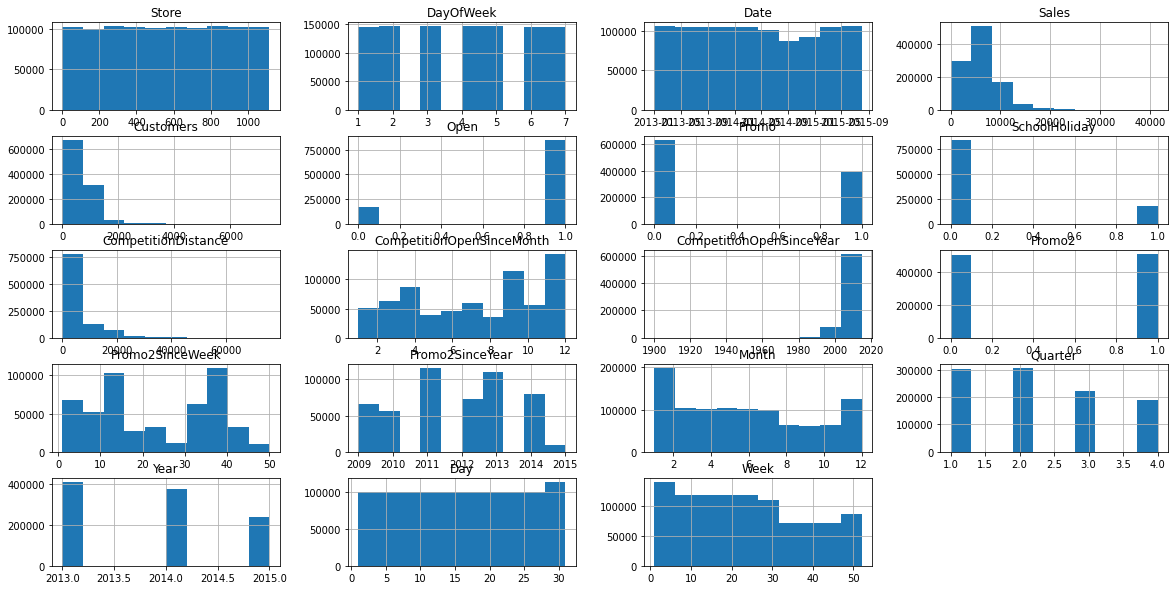

In [26]:
df.hist(figsize = (20, 10))

#### 결측치 정도 확인 및 처리

In [27]:
df.isnull().sum() / df.shape[0] * 100 

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64

+ 결측자료 처리 : 10% 이하이면 대체, 30% 이상이면 변수 제거
+ 범주형 자료 : one-hot 벡터로 자료 변환

In [28]:
df['CompetitionDistance']=df['CompetitionDistance'].fillna(df['CompetitionDistance'].mode())
df['CompetitionDistance'].isnull().sum()

2642

In [29]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
n_columns = ['Customers','Open','Promo','Promo2','StateHoliday','SchoolHoliday','CompetitionDistance']
categ_columns = ['DayOfWeek','Quarter','Month','Year','StoreType','Assortment','Season']

In [30]:
def dummy(data, col):
  lab = LabelEncoder()
  aa = lab.fit_transform(data[col]).reshape(-1, 1)
  ohe = OneHotEncoder(sparse = False)
  column_names = [col +'_' + str(i) for i in lab.classes_]
  return(pd.DataFrame(ohe.fit_transform(aa), columns = column_names))

In [31]:
fdata = df[n_columns]
for column in categ_columns:
  temp_df = dummy(df, column)
  fdata = pd.concat([fdata, temp_df], axis = 1)
fdata.head()

,Customers,Open,Promo,Promo2,StateHoliday,SchoolHoliday,CompetitionDistance,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,555,1,1,0,0,1,1270.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,546,1,1,0,0,1,1270.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,523,1,1,0,0,1,1270.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,560,1,1,0,0,1,1270.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,612,1,1,0,0,1,1270.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
fdata.shape

(1017209, 44)

In [33]:
fdata.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [34]:
fdata["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [35]:
fdata["StateHoliday"] = np.where(fdata["StateHoliday"] == "o",0,1)

### 2.4 불균형자료(Imbalanced data)의 처리

In [36]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN
X, y = make_classification(n_classes = 3, weights = [0.03, 0.07, 0.9], n_features= 10,
                           n_clusters_per_class = 1, n_samples = 2000, random_state = 10)
print("Original dataset shape %s" % Counter(y))

Original dataset shape Counter({2: 1795, 1: 141, 0: 64})


In [37]:
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(X, y)
print("Resampled dataset shape %s" % Counter(y_res))

Resampled dataset shape Counter({2: 1795, 1: 1795, 0: 1795})


In [38]:
ada = ADASYN(random_state = 0)
X_syn, y_syn = ada.fit_resample(X, y)
print("Resampled dataset shape from ADASYN %s" % Counter(y_syn))

Resampled dataset shape from ADASYN Counter({1: 1805, 2: 1795, 0: 1795})


### 2.5 특성변수의 선택
+ 불필요한 특성변수를 제거하여 일반화가 가능한 모형을 구축하는데 중요한 역할을 함
+ 특성변수가 너무 많아 차원을 줄이는데 기여하는 통계적 기법

In [39]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
x, y = load_digits(return_X_y = True)
x.shape

(1797, 64)

In [40]:
import numpy as np
print(x[:2])
print(np.unique(y))

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]]
[0 1 2 3 4 5 6 7 8 9]


In [41]:
sb = SelectKBest(score_func = chi2, k = 20)
x_new = sb.fit_transform(x, y)
x_new.shape

(1797, 20)

In [42]:
sb.get_support()

array([False, False, False, False, False,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True,  True,  True, False, False, False, False,  True,
       False,  True, False,  True, False, False,  True,  True, False,
       False, False, False, False, False,  True,  True,  True,  True,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False,  True,  True,
       False])

In [43]:
sb.scores_

array([          nan,  811.90700411, 3501.28249552,  698.9252572 ,
        438.52969882, 3879.81925999, 3969.45823205, 1193.5608181 ,
         24.79521396, 2953.83108764, 2583.65198939,  388.24205944,
        824.69094853, 3676.48924765, 1983.5796061 ,  597.24198237,
          8.95886124, 1924.21690377, 2409.27140681, 3556.31594594,
       4871.94194551, 4782.19921618, 2155.17378998,  376.76583333,
          7.90090158, 2471.82418401, 4515.48149826, 2986.64314847,
       3724.09567634, 3208.64686641, 5138.07412439,   35.71270718,
                 nan, 5688.25079535, 5262.46646904, 3165.0605867 ,
       3231.63943369, 2532.99695611, 3288.81403655,           nan,
        142.85082873, 3863.85787901, 6416.0867248 , 5448.25154235,
       4079.73153383, 2134.02540236, 4486.34097862,  313.53898127,
         70.39927392,  449.72327313, 2801.97224468, 1527.54519627,
       1653.15892311, 3073.99803898, 5251.21748723,  683.88227339,
          9.15254237,  851.06791492, 3800.2473108 ,  730.92975

In [44]:
sb.pvalues_

array([            nan, 5.81310493e-169, 0.00000000e+000, 1.17740541e-144,
       8.11314242e-089, 0.00000000e+000, 0.00000000e+000, 2.97727113e-251,
       3.20626273e-003, 0.00000000e+000, 0.00000000e+000, 4.41344943e-078,
       1.02825052e-171, 0.00000000e+000, 0.00000000e+000, 8.18335060e-123,
       4.41080315e-001, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.23435651e-075,
       5.44163062e-001, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 4.45801029e-005,
                   nan, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000,             nan,
       2.65875300e-026, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 3.49452723e-062,
       1.27145348e-011, 3.28604761e-091, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [45]:
# !pip install plotly

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import pandas as pd
import plotly.express as px
md1 = make_pipeline(SelectKBest(k = 30), PCA(n_components = 3))
x_new = md1.fit_transform(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [ 0 32 39] are constant.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide



In [47]:
df1 = pd.DataFrame({"X" : x_new[:, 0], "Y" : x_new[:, 1], "Z" : x_new[:, 2], "C" : y})
df1.head()

,X,Y,Z,C
0,0.276804,21.055844,-12.080075,0
1,3.802508,-20.682673,8.282906,1
2,2.109102,-6.277950,2.485254,2
3,-12.256676,4.399914,14.435489,3
4,21.242481,-0.851893,-1.784786,4


In [48]:
fig = px.scatter_3d(df1, x = "X", y = "Y", z = "Z", color = "C")
fig.show()

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import KernelPCA
import pandas as pd
import plotly.express as px
md2 = make_pipeline(SelectKBest(k = 30), KernelPCA(kernel = "rbf", n_components = 6))
x_new2 = md2.fit_transform(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [ 0 32 39] are constant.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide



In [50]:
df2 = pd.DataFrame({"X" : x_new2[:, 0], "Y" : x_new2[:, 1], "Z" : x_new2[:, 2], "C" : y})
df2.head()

,X,Y,Z,C
0,-0.004879,-0.004892,-0.013003,0
1,-0.001904,-0.000930,-0.002036,1
2,-0.001876,-0.000907,-0.001985,2
3,-0.001904,-0.000926,-0.002028,3
4,-0.001874,-0.000906,-0.001983,4


In [51]:
fig = px.scatter_3d(df2, x = "X", y = "Y", z = "Z", color = "C")
fig.show()

In [52]:
df3 = pd.DataFrame({"X" : x_new2[:, 3], "Y" : x_new2[:, 4], "Z" : x_new2[:, 5], "C" : y})
fig = px.scatter_3d(df3, x = "X", y = "Y", z = "Z", color = "C")
fig.show()